In [1]:
import pandas as pd
import numpy as np
df_athletes = pd.read_csv("Data/athletesWomenGames2019.csv",sep=';',na_values = ['--']);
df_athletes.drop(['CountryCode','RegionalName','RegionName','RegionCode','RegionalCode','Rn5k'],axis=1,inplace=True);

In [11]:
feat_drop = ['Gender','RegionId','Profession','AffiliateId','DivisionId','CountryOfOriginCode']
df_strength = df_athletes.drop(feat_drop,axis=1);

In [4]:
def strengthMeanByMovement(df,movement):
    df_movement = df[df[movement].notnull()].reset_index();
    min = int(round(df_movement['Weight_kg'].min()))
    max = int(round(df_movement['Weight_kg'].max()))
    df_movement['Weight_range'] = pd.cut(df_movement.Weight_kg,range(min-1,max+2,6), include_lowest=True)
    df_movement = df_movement[['Weight_range',movement]]
    df_movement = round(df_movement.groupby('Weight_range').mean())
    return df_movement

In [5]:
df_BackSquat = strengthMeanByMovement(df_strength,'BackSquat_kg')
df_BackSquat

,BackSquat_kg
Weight_range,
"(50.999, 57.0]",112.0
"(57.0, 63.0]",123.0
"(63.0, 69.0]",128.0
"(69.0, 75.0]",121.0
"(75.0, 81.0]",127.0


In [6]:
df_CleanAndJerk = strengthMeanByMovement(df_strength,'CleanAndJerk_kg')
df_CleanAndJerk

,CleanAndJerk_kg
Weight_range,
"(50.999, 57.0]",81.0
"(57.0, 63.0]",91.0
"(63.0, 69.0]",95.0
"(69.0, 75.0]",98.0
"(75.0, 81.0]",98.0


In [7]:
df_Snatch = strengthMeanByMovement(df_strength,'Snatch_kg')
df_Snatch

,Snatch_kg
Weight_range,
"(50.999, 57.0]",61.0
"(57.0, 63.0]",72.0
"(63.0, 69.0]",80.0
"(69.0, 75.0]",81.0
"(75.0, 81.0]",83.0


In [8]:
df_DeadLift = strengthMeanByMovement(df_strength,'DeadLift_kg')
df_DeadLift

,DeadLift_kg
Weight_range,
"(50.999, 57.0]",130.0
"(57.0, 63.0]",144.0
"(63.0, 69.0]",152.0
"(69.0, 75.0]",155.0
"(75.0, 81.0]",159.0


In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

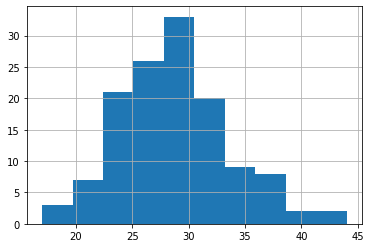

In [21]:
df_athletes['Age'].hist(label = 'Age');

In [27]:
print('Women athletes in CrossFit Games 2019:')
print('Mean values for strength marks selected by body weight range')
df_meanByStrength = pd.concat([df_BackSquat, df_CleanAndJerk,df_Snatch,df_DeadLift],axis=1)
df_meanByStrength

Women athletes in CrossFit Games 2019:
Mean values for strength marks selected by body weight range


,BackSquat_kg,CleanAndJerk_kg,Snatch_kg,DeadLift_kg
Weight_range,,,,
"(50.999, 57.0]",112.0,81.0,61.0,130.0
"(57.0, 63.0]",123.0,91.0,72.0,144.0
"(63.0, 69.0]",128.0,95.0,80.0,152.0
"(69.0, 75.0]",121.0,98.0,81.0,155.0
"(75.0, 81.0]",127.0,98.0,83.0,159.0
